<a href="https://colab.research.google.com/github/lulari425/Aiffel_Quest/blob/main/exp_13_mlops_By_jkw_lhn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회고
- 이한나 : 이번 프로젝트에서는 CIFAR-10 모델을 TensorFlow Serving을 통해 배포하기 위해 Docker를 사용하여 환경을 설정하고, 모델을 효율적으로 서비스하는 방법을 배웠습니다. 이 과정에서   Docker 컨테이너와 TensorFlow Serving을 활용하여 머신러닝 모델을 배포하는 실전 경험을 쌓을 수 있었습니다. Docker 컨테이너가 실행 중인 상태에서 동일한 포트를 사용하려고 하면 충돌이 발생하는 문제를 해결하기 위해, Docker Dashboard를 사용하여 컨테이너를 중지하거나 제거하는 방법을 익혔습니다.  이번 프로젝트를 통해 여러 문제를 해결하면서 Docker와 TensorFlow Serving에 대한 이해도가 높아졌습니다. 특히, 환경 설정 문제, 포트 충돌 문제, 파일 경로 문제 등 실제 배포 환경에서 자주 발생할 수 있는 문제들을 다루는 경험을 쌓았습니다.
- 정권영 : 첫번째로 WSL, 우분투 설치에서 막혔었고 두번째로 스크립트 모델 배포에서 막혔습니다. LMS에서는 텍스트 및 이미지로 설명이 되어있었는데 영상 교육을 했으면 더 좋았을 것 같습니다.
또한 모델 저장에서 cifar10.keras로 저장하여 테스트했는데 우분투에서 읽어 들이지 못해 1시간넘게 고생하였습니다. 다행히 주현님이 알려주신 방법으로 모델 저장을 하였더니 다행이 잘 실행이 되었습니다.

  

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


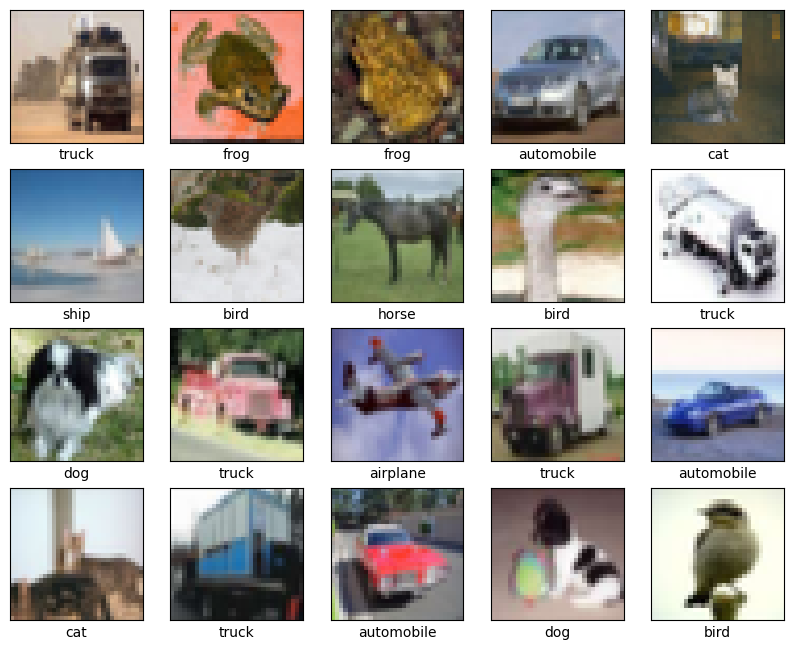

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 랜덤으로 20개의 이미지 선택
random_indices = np.random.choice(len(x_train), 20, replace=False)

# 이미지 시각화
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx])
    plt.xlabel(class_names[y_train[idx][0]])
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    AveragePooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    AveragePooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 8, 8, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,071,178 (4.09 MB)

 Trainable params: 1,070,986 (4.09 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3465 - loss: 1.9350 - val_accuracy: 0.4306 - val_loss: 1.6786
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5279 - loss: 1.3193 - val_accuracy: 0.5189 - val_loss: 1.3520
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5966 - loss: 1.1258 - val_accuracy: 0.6017 - val_loss: 1.1255
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6495 - loss: 0.9902 - val_accuracy: 0.6416 - val_loss: 1.0147
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6884 - loss: 0.8746 - val_accuracy: 0.6178 - val_loss: 1.1010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7259 - loss: 0.7785 - val_accuracy: 0.6803 - val_loss: 0.9316
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7515 - loss: 0.7018 - val_accuracy: 0.6899 - val_loss: 0.9520
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7753 - loss: 0.6325 - val_accuracy: 0

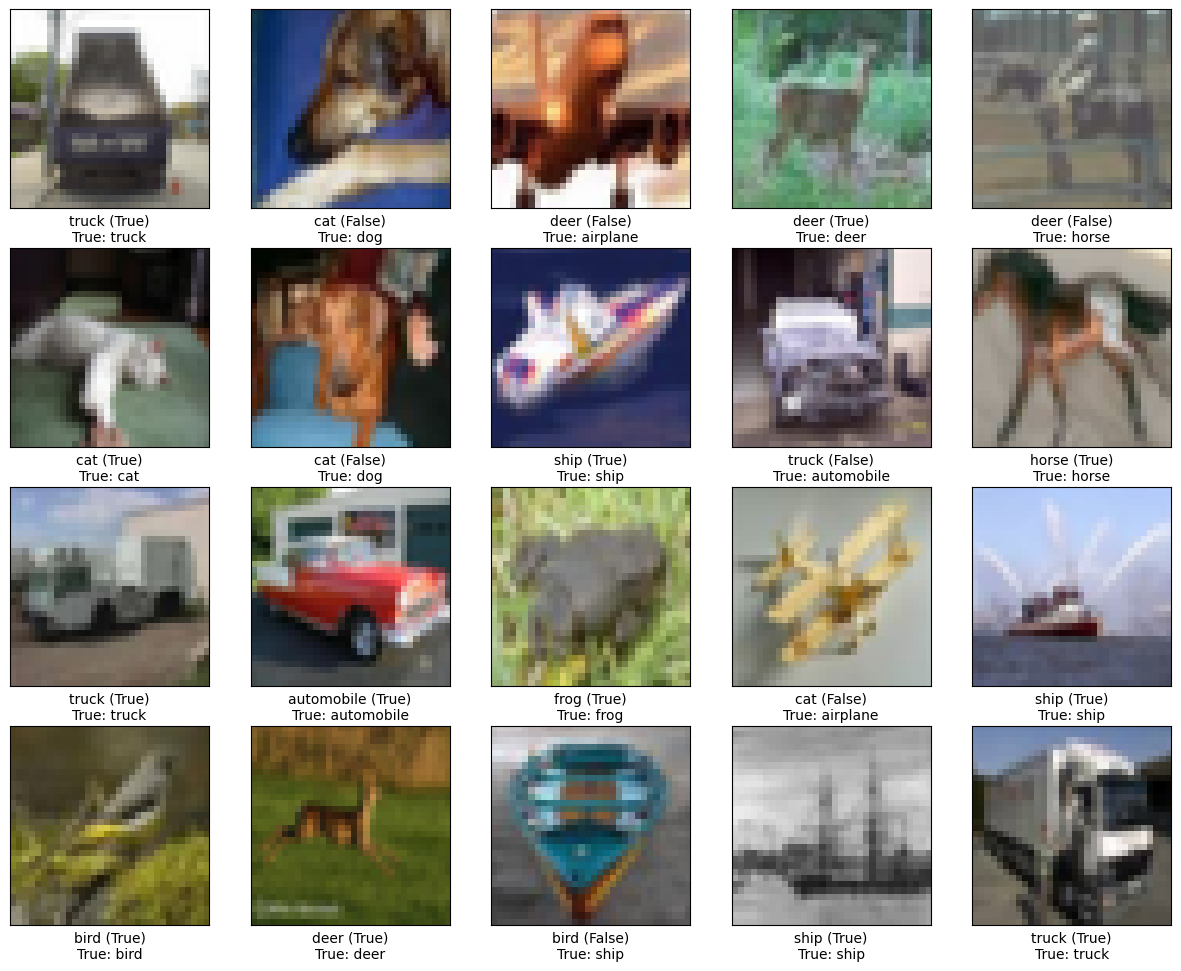

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 전처리
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CIFAR-10 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 모델 정의 (이전에 설명한 모델을 사용)
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    AveragePooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    AveragePooling2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.2, verbose=1)

# 랜덤으로 20개의 이미지 선택
random_indices = np.random.choice(len(x_test), 20, replace=False)

# 이미지 시각화 및 예측
plt.figure(figsize=(15, 15))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[idx])

    # 예측
    prediction = model.predict(np.expand_dims(x_test[idx], axis=0))
    predicted_label = np.argmax(prediction)
    true_label = np.argmax(y_test[idx])

    # 라벨 및 True/False 출력
    label = class_names[predicted_label]
    true_label_name = class_names[true_label]
    correct = (predicted_label == true_label)

    plt.xlabel(f"{label} ({correct})\nTrue: {true_label_name}")
plt.show()

In [ ]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - 5ms/step - accuracy: 0.7164 - loss: 1.4189
Test accuracy: 0.7164000272750854


In [ ]:
from google.colab import drive
# Google Drive 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/Aiffel/Docker/cifar10.keras')

In [ ]:
import tensorflow as tf
import os

model_dir = "/content/drive/MyDrive/Aiffel/Docker/cifar10_1"
model_version = 1
model_export_path = f"{model_dir}/{model_version}"

tf.saved_model.save(
    model,
    export_dir=model_export_path,
)

print(f"SavedModel files: {os.listdir(model_export_path)}")

SavedModel files: ['variables', 'assets', 'saved_model.pb', 'fingerprint.pb']


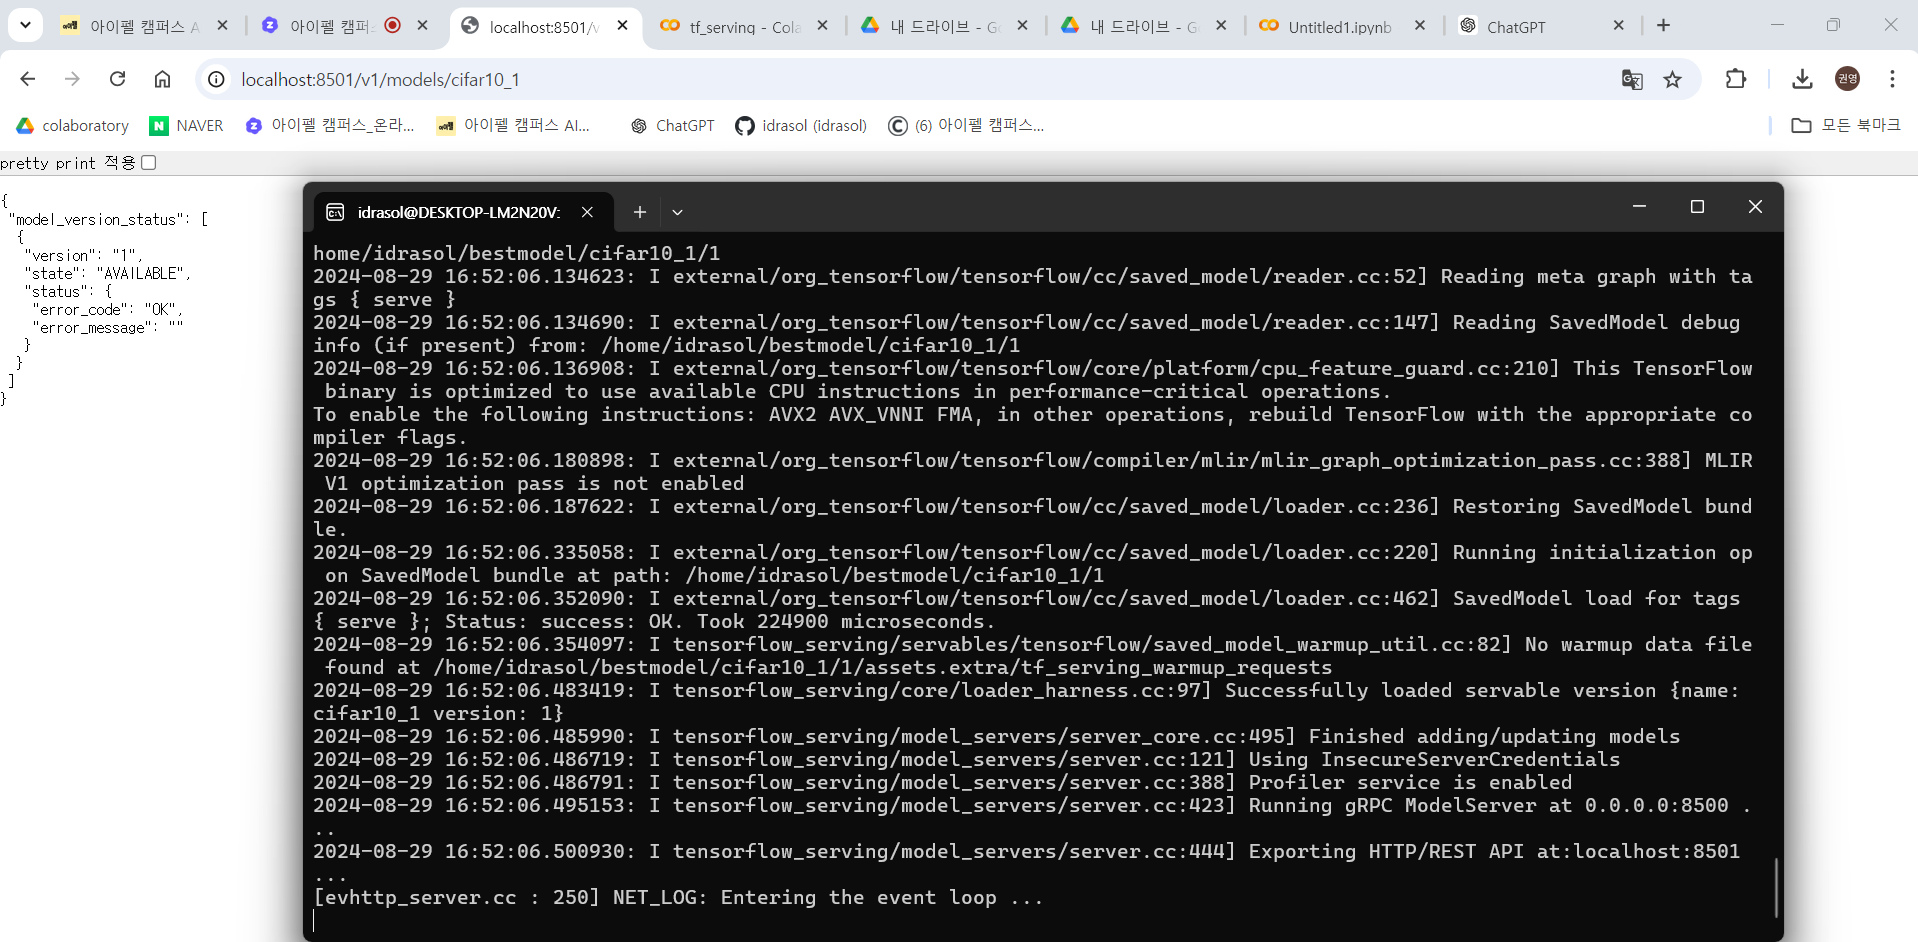